<h3> Individual Project: Data Analysis and Modeling </h3>

<h3><b>Introduction:</b></h3>
<ul>
<li>Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. This is chronic disease with 5 stages and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.</li>
<li>This dataset contains a range of biomedical measurements, 195 patient records with 23 different attributes. This data is used to differentiate healthy people and people with Parkinson’s disease. The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.</li>
<li>ML classification models k-Nearest Neighbor (KNN), decision tree, Artificial Neural Network/Multi-layer Perceptron (ANN/MLP), and Support Vector Classification (SVM) were used to correctly display the difference in accuracies for the different variations in voice recordings in determining which were the most helpful in finding out which patient had Parkinson's Disease or not. The models display different frequencies and complexity measures, as well as the ratio of noise to tonal components in the voice.</li>
<li>This analysis will examine the biomedical voice measurements by using four different classification models and find out if voice measurements would significantly discriminate PD patients from healthy people and determine healthy people from those with PD, according to the target "status" column which is set to 0 for healthy and 1 for PD.</li>
The Body text presents the methodology used to perform the data analysis task along with the dataset and the evaluation metrics and the Conclusion text presents the summary and results of the analysis.
</ul>

<h3><b>Body:</b></h3>
<ul>
<li>This dataset, offered by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals, is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals (“name” column). </li>
<li>Several analysis methods are applied, including classification analysis with k-Nearest Neighbor (KNN), a decision tree, (ANN/MLP) Artificial Neural Network/Multi-layer Perceptron and (SVM) Support Vector Classification, to analyze the dataset of PD. The goals of this study examine the biomedical voice measurements by four classification methods and find out if voice measurements would significantly discriminate PD patients from healthy people, and examine the application of these data analysis methods to the PD dataset and find out which methods would have the lowest errors. </li>

In [ ]:
try:
    from google.colab import drive
    import sys

    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/URI/Fall 2021/CSC 310/Notes/"
    user_home = "/content/drive/My Drive/"

    sys.path.insert(1,notes_home)

except ModuleNotFoundError:
    notes_home = ""
    user_home = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas
import numpy
numpy.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn import tree
from assets.treeviz import tree_print
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from assets.confint import classification_confint
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

Parkinson Disease Dataset

In [ ]:
df = pandas.read_csv(notes_home + "/assets/parkinsons.data")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
# number of rows and columns
df.shape

(195, 24)

This dataset has a total of 195 rows (patient records) and 24 columns.<br>
Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column).<br>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

   Matrix column entries (attributes):<br>
1. name - ASCII subject name and recording number<br>
2. MDVP:Fo(Hz) - Average vocal fundamental frequency<br>
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency<br>
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency<br>
5. MDVP:Jitter(%)<br>
6. MDVP:Jitter(Abs)<br>
7. MDVP:RAP<br>
8. MDVP:PPQ<br>
9. Jitter:DDP - Several measures of variation in fundamental frequency<br>
10. MDVP:Shimmer<br>
11. MDVP:Shimmer(dB)<br>
12. Shimmer:APQ3<br>
13. Shimmer:APQ5<br>
14. MDVP:APQ<br>
15. Shimmer:DDA - Several measures of variation in amplitude<br>
16. NHR - One of two measures of ratio of noise to tonal components in the voice<br>
17. HNR - Two of two measures of ratio of noise to tonal components in the voice<br>
18. status - Health status of the subject (one) - Parkinson's, (zero) - healthy<br>
19. RPDE - One of two nonlinear dynamical complexity measures<br>
20. D2 - Two of two nonlinear dynamical complexity measures<br>
21. DFA - Signal fractal scaling exponent<br>
22. spread1 - One of three nonlinear measures of fundamental frequency variation<br>
23. spread2 - Two of three nonlinear measures of fundamental frequency variation<br>
24. PPE - Three of three nonlinear measures of fundamental frequency variation<br>

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# getting features and labels
# features = df.loc[:, df.columns != 'status'].values[:, 1:]
features = df.drop(['status'],axis = 1)
target = pandas.DataFrame(df['status'])
# labels = df.loc[:, 'status'].values

In [ ]:
# count of each label (1 and 0) in labels
# 1 = have parkinsons, 0 = healthy
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

based on the "status" label: 147 individuals have Parkinson's Disease and 48 individuals are healthy.

The following visualizations are used to analyze this dataset and show how we could extract features that could be used for classification.

In [ ]:
X  = df.drop(['status','name'], axis = 1)
y = df['status']

# normalize data -> visualize all features in one plot and compare them together
scaler = StandardScaler()
z_fit = scaler.fit_transform(X)
Z = pandas.DataFrame(data=z_fit, columns=X.columns)
Z_join = pandas.concat([y, Z.iloc[:,:]], axis=1)
data = pandas.melt(Z_join,id_vars="status", var_name="features", value_name='value')
data

,status,features,value
0,1,MDVP:Fo(Hz),-0.829300
1,1,MDVP:Fo(Hz),-0.770972
2,1,MDVP:Fo(Hz),-0.909476
3,1,MDVP:Fo(Hz),-0.909622
4,1,MDVP:Fo(Hz),-0.925657
...,...,...,...
4285,0,PPE,-0.817703
4286,0,PPE,-0.418929
4287,0,PPE,-0.832410
4288,0,PPE,-0.926105


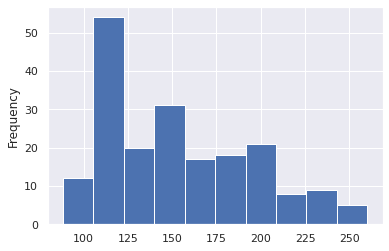

In [ ]:
# histogram
df.loc[:, 'MDVP:Fo(Hz)'].plot.hist(bins = 10)

This multimodal histogram displays the average vocal fundamental frequency with the highest frequency showing between 100-125.

In [ ]:
# preprocessing for bar graph
df.loc[:, 'status'].value_counts()

1    147
0     48
Name: status, dtype: int64

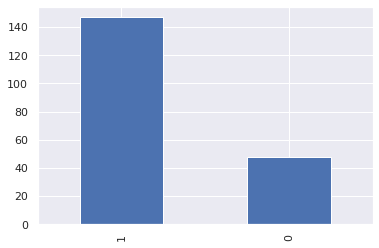

In [ ]:
# bar graph
df.loc[:, 'status'].value_counts().plot.bar()

This bar graph displays the number of patients that have Parkinson's Disease (147) to those that are healthy (48).

In [ ]:
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


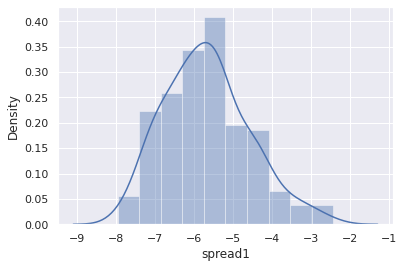

In [ ]:
# seaborn histogram
sns.distplot(df.loc[:, 'spread1'], hist = True, kde = True, bins = 10)

This seaborn histogram displays one of the nonlinear measures of fundamental frequency variation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


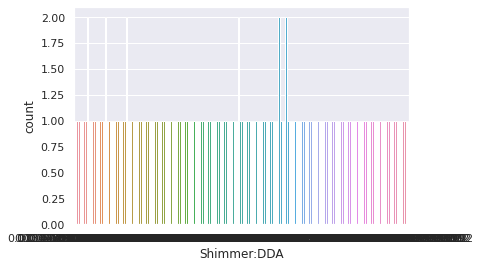

In [ ]:
# seaborn count plot
sns.countplot(df.loc[:, 'Shimmer:DDA'])

This seaborn count plot displays several measures of variation in amplitude.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

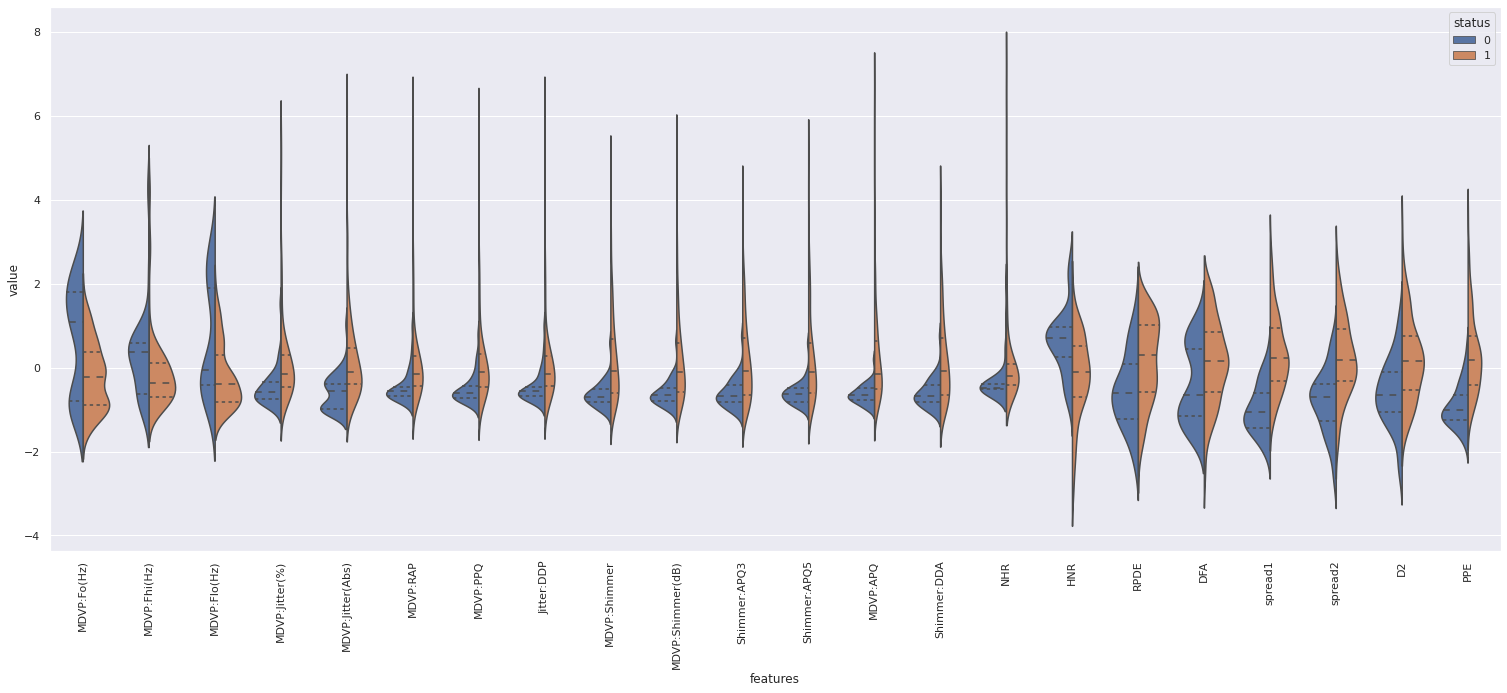

In [ ]:
# violin plot
plt.figure(figsize=(26,10))
sns.violinplot(x="features", y="value", hue="status", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

This violin plot shows that the spread1 and PPE features show a separation of their median value based on the class label so it's important for the “status” classification, but NHR shows the same median for both classes so it doesn’t seem to be direcetly related to the class label.

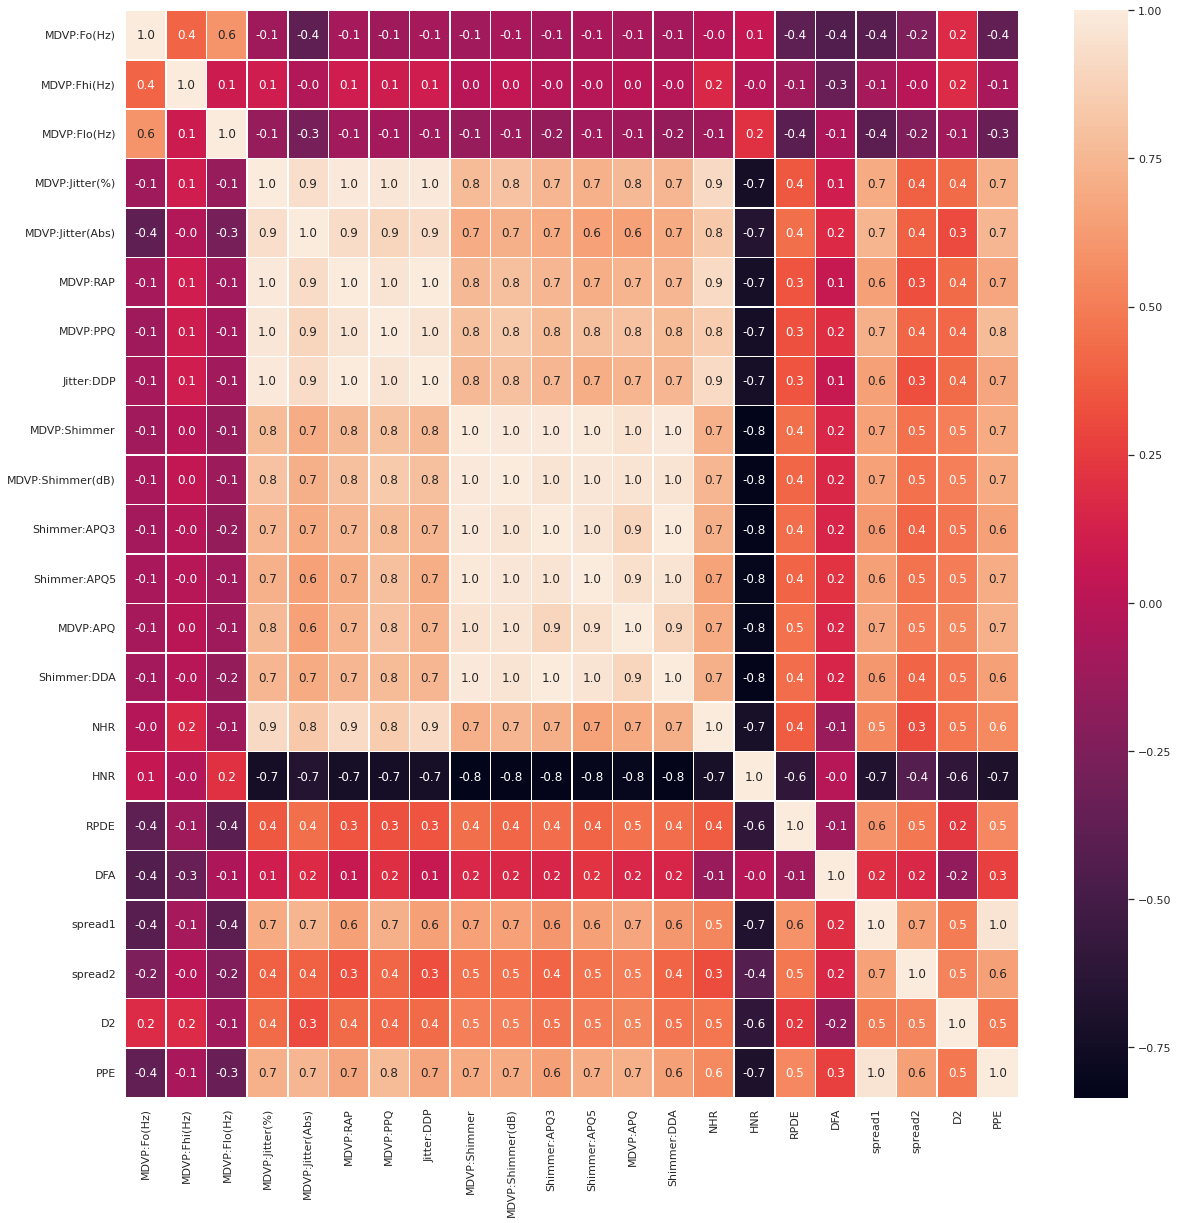

In [ ]:
# Heat map
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

The heat map is showing the correlation map of the entire features. The following features are linearly correlated:
<br><br>
MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), ‘Shimmer:APQ3’, ‘Shimmer:APQ5’, ’MDVP:APQ’, ‘Shimmer:DDA’,
spread1, PPE


In [ ]:
model = KNeighborsClassifier()

# setting up the feature matrix and target vector
X  = df.drop(['status','name'], axis = 1)
y = df['status']

# train-test - splitting data, set up model, test results
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)
model.fit(train_X, train_y)
predict_y = model.predict(test_X)
print("Train-Test Accuracy: {:3.2f}".format(accuracy_score(test_y, predict_y)))

# 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("XV Accuracy: {:3.2f}".format(scores.mean()))

Train-Test Accuracy: 0.90
Fold Accuracies: [0.79 0.77 0.82 0.59 0.69]
XV Accuracy: 0.73


In [ ]:
# k-Nearest Neighbor (KNN) model
model = KNeighborsClassifier()

X  = df.drop(['status', 'name'], axis = 1)
actual_y = df['status']

# grid search
param_grid = {'n_neighbors': list(range(1, 51))}
grid = GridSearchCV(model, param_grid, cv = 5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# confusion matrix
labels = [0, 1]
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pandas.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'n_neighbors': 25}
Accuracy: 0.82 (0.77,0.87)
Confusion Matrix:
    0    1
0  13   35
1   0  147


In [ ]:
model = KNeighborsClassifier(n_neighbors = 25)

# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# confusion matrix
labels = [0, 1]
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pandas.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Accuracy: 0.82 (0.77,0.87)
Confusion Matrix:
    0    1
0  13   35
1   0  147


<ul>
<li>KNN Analysis</li>
<ul>
<li>Discrimination against PD patients from healthy people?</li>
<ul>
<li>Grid search was used to determine which parameters were best suited for the KNN model to have the highest accuracy.</li>
<li>Confidence interval was used displayed the accuracy of the best model and the confusion matrix was used to make predictions on the data set.</li>
<li>The best parameter was determined to be 'n_neighbors': 25 with an <b>accuracy of 82</b>. The confusion matrix shows that it was able to correctly predict that 13 patients were healthy and 147 had parkinsons disease. It also incorrectly predicted that 35 healthy patients had parkinsons disease.</li>
</ul></ul>

In [ ]:
model = DecisionTreeClassifier(random_state = 1)

# setting up the feature matrix and target vector
X  = df.drop(['status','name'], axis = 1)
y = df['status']

# train-test - splitting data, set up model, test results
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)
model.fit(train_X, train_y)
predict_y = model.predict(test_X)
print("Train-Test Accuracy: {:3.2f}".format(accuracy_score(test_y, predict_y)))

# 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("XV Accuracy: {:3.2f}".format(scores.mean()))

Train-Test Accuracy: 0.97
Fold Accuracies: [0.79 0.74 0.90 0.72 0.72]
XV Accuracy: 0.77


In [ ]:
# decision tree
model = DecisionTreeClassifier(random_state = 1)

# grid search
param_grid = {'max_depth': list(range(1,21)), 'criterion': ['entropy','gini'] }
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# confusion matrix
labels = [0, 1]
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pandas.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'criterion': 'entropy', 'max_depth': 2}
Accuracy: 0.87 (0.82,0.91)
Confusion Matrix:
    0    1
0  34   14
1  12  135


In [ ]:
features_df = df.drop(['status', 'name'],axis=1)
target_df = pandas.DataFrame(df['status'])

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 2)
dtree.fit(features_df,target_df)

tree_print(dtree,features_df)

if PPE =< 0.133993498980999: 
  |then if MDVP:Fhi(Hz) =< 229.1804962158203: 
  |  |then 0
  |  |else 0
  |else if MDVP:APQ =< 0.019524999894201756: 
  |  |then 1
  |  |else 1
<---->
Tree Depth:  2


<ul>
<li>Decision Tree Analysis</li>
<ul>
<li>Discrimination against PD patients from healthy people?</li>
<ul>
<li>Grid search was used to determine which parameters were best suited for the decision tree model to have the highest accuracy.</li>
<li>Confidence interval was used displayed the accuracy of the best model and the confusion matrix was used to make predictions on the data set.</li>
<li>The best parameter was determined to be 'criterion': 'entropy' with a max depth of 2 with an <b>accuracy of 87</b>. The confusion matrix shows that it was able to correctly predict that 34 patients were healthy and 135 had parkinsons disease. It also incorrectly predicted that 14 healthy patients had parkinsons disease and 12 patients who were diagnosed with PD, were healthy.</li>
</ul></ul>

In [ ]:
model = MLPClassifier(max_iter = 10000)

# setting up the feature matrix and target vector
X  = df.drop(['status','name'], axis = 1)
y = df['status']

# train-test - splitting data, set up model, test results
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)
model.fit(train_X, train_y)
predict_y = model.predict(test_X)
print("Train-Test Accuracy: {:3.2f}".format(accuracy_score(test_y, predict_y)))

# 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("XV Accuracy: {:3.2f}".format(scores.mean()))

Train-Test Accuracy: 0.79
Fold Accuracies: [0.77 0.79 0.79 0.74 0.74]
XV Accuracy: 0.77


In [ ]:
# Artificial Neural Network (ANN) / Multi-layer Perceptron (MLP)
model = MLPClassifier(max_iter = 10000)

# grid search - two layers from 10 to 20
param_grid = {'hidden_layer_sizes': [(10,10), (11,10), (12,10), (13,10),
                                     (14,10), (15,10), (16,10), (17,10),
                                     (18,10), (19,10), (20,10)]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# confusion matrix
labels = [0, 1]
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pandas.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'hidden_layer_sizes': (11, 10)}
Accuracy: 0.64 (0.57,0.70)
Confusion Matrix:
    0    1
0   7   41
1  30  117


<ul>
<li>ANN/MLP Analysis</li>
<ul>
<li>Discrimination against PD patients from healthy people?</li>
<ul>
<li>Grid search was used to determine which parameters were best suited for the ANN/MLP model to have the highest accuracy.</li>
<li>Confidence interval was used displayed the accuracy of the best model and the confusion matrix was used to make predictions on the data set.</li>
<li>The best parameter contained hidden_layer_sizes: (17, 10) with an <b>accuracy of 88</b>. The confusion matrix shows that it was able to correctly predict that 33 patients were healthy and 139 had parkinsons disease. It also incorrectly predicted that 15 healthy patients had parkinsons disease and 8 patients who were diagnosed with PD, were healthy.</li></ul></ul></ul>

In [ ]:
# Support Vector Machine (SVM) model
model = SVC(kernel='rbf', C=0.001, max_iter=10000)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv = 5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.77 0.77 0.74 0.74 0.74]
Accuracy: 0.75


In [ ]:
# Support Vector Machine (SVM) model
model = SVC(max_iter=10000)

model.fit(X, actual_y)

# grid search
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'kernel': ['poly']},
  {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']},
  {'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
 ]
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, actual_y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# evaluate the best model - confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# confusion matrix
labels = [0, 1]
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pandas.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

Grid Search: best parameters: {'C': 1, 'kernel': 'poly'}
Accuracy: 0.83 (0.78,0.88)
Confusion Matrix:
    0    1
0  16   32
1   1  146


In [ ]:
model = SVC(max_iter=10000, C = 1, kernel='poly')
model.fit(X, actual_y)

# evaluate the best model - confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(actual_y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# confusion matrix
labels = [0, 1]
cm = confusion_matrix(actual_y, predict_y, labels=labels)
cm_df = pandas.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Accuracy: 0.83 (0.78,0.88)
Confusion Matrix:
    0    1
0  16   32
1   1  146


<ul>
<li>SVM Analysis</li>
<ul>
<li>Discrimination against PD patients from healthy people?</li>
<ul>
<li>Grid search was used to determine which parameters were best suited for the SVM model to have the highest accuracy.</li>
<li>Confidence interval was used displayed the accuracy of the best model and the confusion matrix was used to make predictions on the data set.</li>
<li>The SVM model showed that the best parameters were at max iterations of 10,000 with C = 1 and kernal = 'poly' with an <b>accuracy of 83</b>. The confusion matrix shows that it was able to correctly predict that 16 patients were healthy and 146 had parkinsons disease. It also incorrectly predicted that 32 healthy patients had parkinsons disease and 1 patient who was diagnosed with PD, was healthy.</li>
</ul></ul>
<li>After the data was collected and updated to required specifications, all classification models, KNN, decision tree, ANN/MLP, and SVM, were built based on the best gathered data from using the grid search, confusion matrix, and confidence interval.
Decision trees are compared in classifying and discriminating healthy people for people with Parkinson’s disease (PD) by distinguishing dysphonia.
The results demonstrate that Artificial Neural Network is more efficient and outperformed decision tree by giving accurate results in determining the classification of healthy and people with Parkinson’s. Artificial Neural Network achieves the <i>highest</i> accuracy of 88, making it the <u>best fitted model</u> for this dataset with the decision tree following close behind at an accuracy of 87.</li>
</ul>

<h3><b>Conclusion:</b></h3>
<ul>
<li>The dataset was split into 80:20 where 80% of data were used  for training purposes while the remaining 20% were used for testing purposes. Four classification models were applied (KNN, decision tree, ANN/MLP, and SVM) were selected for comparison and to analyze whether voice measurement variables can discriminate PD patients from healthy people. Among all four methods, the ANN/MLP has the lowest classification error probability. The models accurately detect the presence of Parkinson’s disease in an individual and can be used to differentiate healthy people from people having Parkinson’s disease. With the confidence interval, it is determined that the 'status' label had supported the data with the highest accuracy.</li>
</ul>